# Final Report on Computational SPDEs
#### Guanyu Chen

## Abstract
This report focuses on numerical methods for stochastic partial differential equations (SPDEs), covering various aspects such as the generation of (stationary) stochastic processes and random fields, numerical methods for stochastic ordinary differential equations (SODEs), SPDEs with random data and semilinear SPDEs. To facilitate solving SPDEs, we also implemented the finite element method (FEM) for standard partial differential equations (PDEs). 

The accompanying `.ipynb` file reproduces the figures from the chapters of the referenced book, presenting a comprehensive workflow for solving SPDEs. The utility functions in `Utils.py` are adapted from the original "Chap.ipynb" files, with minor modifications to improve usability and integration.

This report aims to provide a complete narrative on tackling SPDEs numerically, from foundational concepts to practical implementations.

[`Remark`] This report is a record of my SPDE learning process. We have been working on a seminar about SDE recently. Feel free to follow: [(Seminar)](https://github.com/Zebrainy-cgy/SDE)

`Reference book`: [--BOOK--](./(Cambridge%20Texts%20in%20Applied%20Mathematics)%20Gabriel%20J.%20Lord,%20Catherine%20E.%20Powell,%20Tony%20Shardlow%20-%20An%20Introduction%20to%20Computational%20Stochastic%20PDEs-Cambridge%20University%20Press%20(2014).pdf)

`Official code`: [--CODE--](https://github.com/tonyshardlow/PICSPDE) (It is somewhat outdated, and exists some issues. But it is stll nice as reference code)

`Python version`: Python 3.11.7

The rest of the report is organized as follows: 

Since the random variables in SPDE usually occur in the form of stochastic processes and random fields. So we begin our journey from **Stochastic Process**, and then we focus on a special class of stochastic process: **Gaussian stationary process**. After that we extend to **Random Field**. So, after we have the ability to generate the random vairables in SPDE, we can deal with the **stationary SPDE**(SPDE with random data). Finally, we need to develop the numeric methods for **SODEs** before we can solve **time-dependent SPDE**.

In [1]:
import Utils
from math import *
import numpy as np
import matplotlib.pyplot as plt

## Stochastic Process
Usually we need the stochastic process $\{X(t): t\in \Tau\}$ to be second-order. Mean function and covarriance function as $\mu(t) = \mathbf{E}[X(t)]$ and $C(s, t) = Cov(X(s), X(t))$. So, Brownian Motion $W(t)$ is defined as a real-valued Gaussian Process with mean $\mu(t)=0$ and covariance $C(s, t)= min\{s, t\}$. We can prove the existence of Brownian Motion $W(t)$ by the rescaled linear interpolation $Y_N(t)$ of Random Walk as $N\rightarrow \infty$. We plot an example of Brownian Motion.

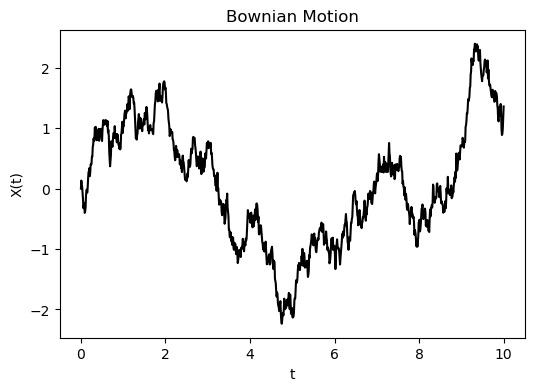

In [2]:
T = 10; N = 1000
t, X = Utils.BrownianMotion(T, N, seed=24)
Utils.Plot(t, X, 't', 'X(t)', 'Bownian Motion')

Since for a fixed $w$, $X(t, w)$ is a real-valued determined function $f$: $\Tau \rightarrow \mathbf{R}$, note the set of $f$ as $\mathbf{R}^{\mathbf{T}}$, whose Borel set noded as $\mathcal{B}(\mathbf{R}^{\mathbf{T}})$. So it is fair to say that a sample path defines a $\mathbf{R}^{\mathbf{T}}$-valued random variable. 

We need to distinguish the difference between independent processes and independent pathes. An important theorem says that: Any real-valued second order stochastic process $\{X(t): t\in \mathbf{T}\}$ with $\mu(t)$ and $C(s, t)$, then $\mu: \mathbf{T}\rightarrow \mathbf{R}$ and $C: \mathbf{T}\times \mathbf{T}\rightarrow \mathbf{R}$ is symmetric and non-negative definite. Conversely is also true: Any such $\mu, C$ is a mean and covariance of some stochastic process. So if the process is a Gaussian Process, then the process is determined by its mean and covariance function.

### Examples
#### Gaussian Process with cosine covariance
we take $C(s, t) = cos(s-t)$. We  can vertify that $C(s,t)$ is a symmetric and non-negative definite. Also we find that $X(t)=\xi_1cos(t) + \xi_2sin(t)$ is a Gaussian process with mean 0 and covariance $cos(s-t)$. We plot some sample paths.

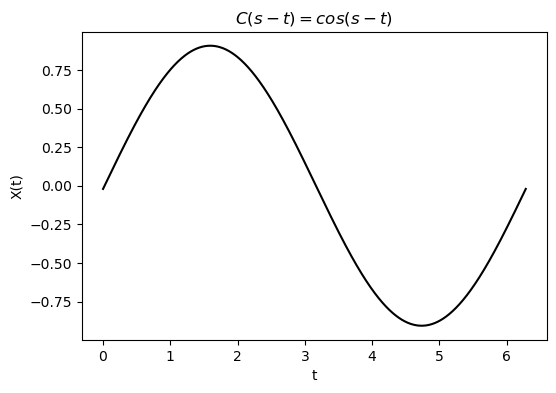

In [3]:
def Xt_cosine_covariance(T, N, seed=None):
    t = np.linspace(0, T, N + 1)
    np.random.seed(seed)
    xi = np.random.randn(2)
    X = np.cos(t) * xi[0] + np.sin(t) * xi[1]
    return t, X
T = 2*pi; N = 1000
t, X = Xt_cosine_covariance(T, N)
Utils.Plot(t, X, 't', 'X(t)', '$C(s-t) = cos(s-t)$')

#### Brownian Bridge
It is interesting to consider the values of Brownian Motion in $(0, T)$, having fixed value at specific points like $t=0$ and $t=T$. We call that **Brownian Bridge** $B(t)$. So we can write the dinite-dimentional distribution of $B(t)$ as: $$...$$
And for measurable function $\phi: \mathbf{R}^N\rightarrow \mathbf{R}$, we have $$...$$
then we have the mean and covariance function: $$...$$
We can vertify that Brownian Bridge $\{B(t): t\in [0, T]\}$ with condition $B(0)=B(T)=0$ is Gaussian with mean zero and covariance $C(s,t)=min\{s,t\}-st/T$. And $W(t) - tW(T)/T$ has the same distribution as $B(t)$.

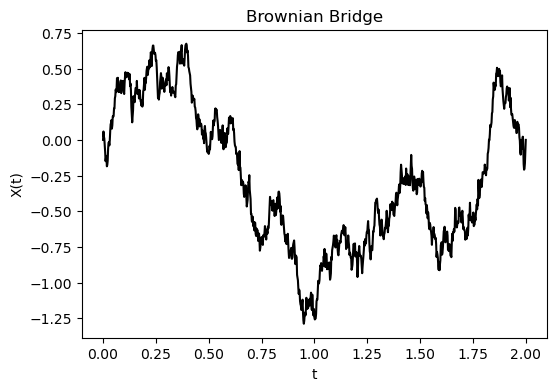

In [4]:
t, B = Utils.BrownianBridge(2, 1000, 24)
Utils.Plot(t, B, 't', 'X(t)', 'Brownian Bridge')

#### Fractional Bownian Motion
The Brownina Motion have two good properties: 
1. self-similarity: $\tilde{W}(t) = \alpha W(t/\alpha)$ has the same distribution as $W(t)$
2. stationary increments: $W(t) - W(s)$ is the same distribution as $W(t+h) - W(s+h)$

We define the fractional Brownian Motion $B^H(t)$ where $H\in (0,1)$ is the Hurst param: a Gaussian process with mean zero and covariance function $\frac{1}{2}(|t|^{2H}+|s|^{2H}-|t-s|^{2H})$. 

It can be found that the increments of fBM is correlated. So the sample path will be shown later using KL expansion; But when $H=\frac{1}{2}$, the fBM is Brownian Motion, which is much easier to show.

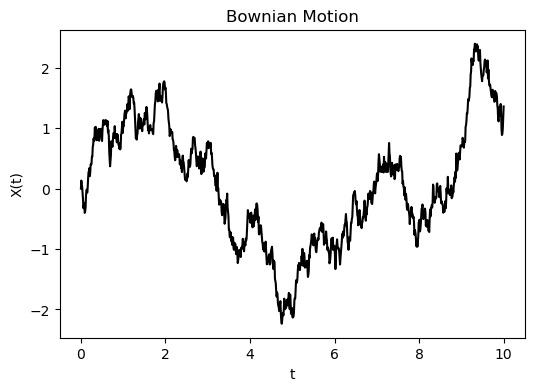

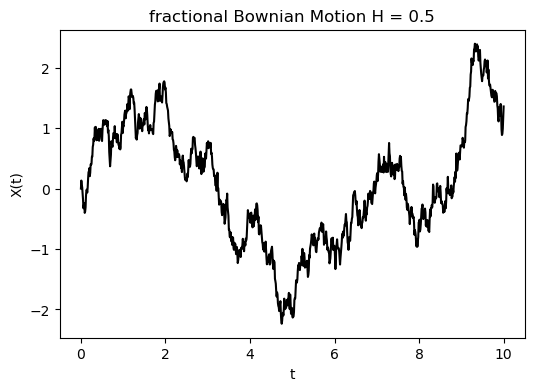

In [5]:
T = 10; N = 1000
t, X = Utils.BrownianMotion(T, N, seed=24)
Utils.Plot(t, X, 't', 'X(t)', 'Bownian Motion')
alpha = 0.3
_, X2 = Utils.BrownianMotion(T/alpha, N, seed=24)
Utils.Plot(t, sqrt(alpha) * X2, 't', 'X(t)', 'fractional Bownian Motion H = 0.5')

#### White noise and coloured noise
The white noise contains a homogeneous mix of all different basis functions. So for $\Tau=[0, T]$, we can find an orthogonal basis $\{\phi_i\}$ for $L^2(\Tau)$. Then consider $$\zeta(t)=\sum_{j=1}^{\infty} \xi_j \phi_j(t)$$ Then we find that the covariance function is $\delta(s-t)$(Dirac function). That means that the white noise is not well-defined in $L^2(\Omega)$. the truncated $\zeta_J(t)$ doesn't converge to functions in $L^2(\Tau)$ as $J\rightarrow \infty$. 

In contrast, the coloured noise is a stochastic process like $$X(t) = \sum_{j=1}^{\infty} \sqrt{v_j}\xi_j \phi_j(t)$$ 
We show that white noise doesn't converge as follows.


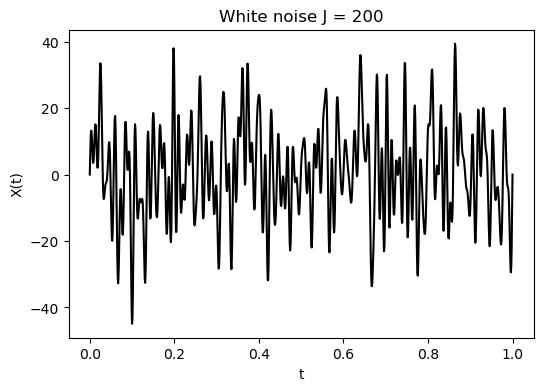

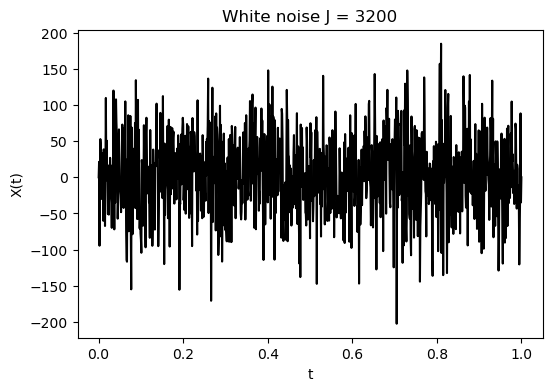

In [3]:
def white_noise(T, N, J, seed=None):
    np.random.seed(seed)
    t = np.linspace(0, T, N + 1)
    xi = np.random.randn(J)
    phi = np.zeros(N + 1)
    for j in range(1, J+1):
        phi = phi + sqrt(2) * np.sin(j * pi * t) * xi[j-1]
    return t, phi

T = 1; N = 1000
t, zeta = white_noise(T, N, 200, seed=24)
Utils.Plot(t, zeta, 't', 'X(t)', 'White noise J = 200')
t, zeta = white_noise(T, N, 3200, seed=24)
Utils.Plot(t, zeta, 't', 'X(t)', 'White noise J = 3200')

### The Karhunen-Loeve expansion
So usually the increments is not uncorrelated ideally, like the fBM, which we cannot simulate just as B.M. step by step.
#### Discrete
 Let $X(t)$ be a real-valued **Gaussian Process** with mean $\mu$ and covariance function $C(s, t)$, define $$...$$
So first and foremost, the covariance matrix **C** is known to be symmetric and non-negative definite, then C can be decomposited by spectral decomposition as $C=U\Sigma U^T$, where $v_j$ is diagonal of $\Sigma$, $u_j$ is column vector of $U$. Let $V = U \Sigma ^{\frac{1}{2}}$, then X can be rewriten as 
$$X = \mu + \sum_{j=1}^N\sqrt{v_j}u_j \xi_j,\qquad \xi\ i.i.d\sim N(0, 1)$$

Using this, we can simulate the fBM then.

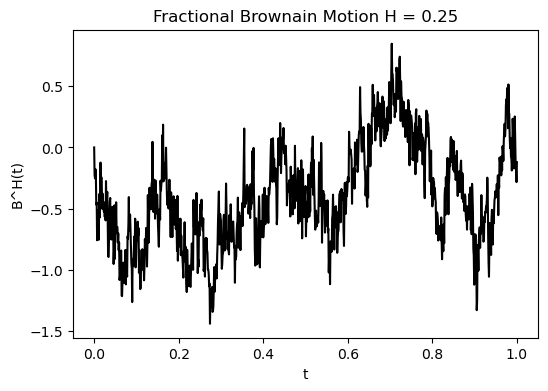

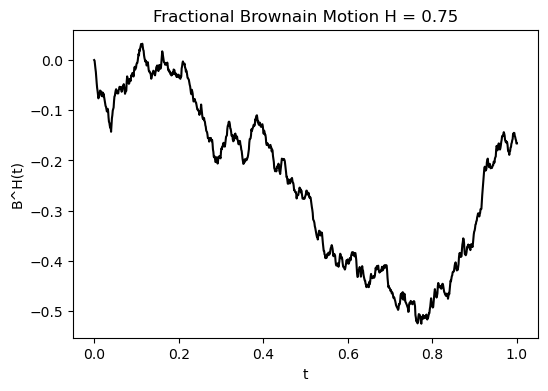

In [7]:
def fBM(T, N, H, seed = None):
    '''H is Hurst parameter of fBM'''
    t = np.linspace(0, T, N + 1)
    C = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(N + 1):
            ti = t[i]; tj = t[j]
            C[i, j] = 0.5 * (pow(ti, 2*H) + pow(tj, 2*H) - pow(abs(ti - tj), 2*H))
    S, U = np.linalg.eig(C)
    np.random.seed(seed)
    xi = np.random.randn(N + 1)
    X = np.dot(U, S**0.5 * xi)
    return t, X
T = 1; N = 1000; H = 1/4
t, BH = fBM(T, N, H)
Utils.Plot(t, BH, 't', 'B^H(t)', f'Fractional Brownain Motion H = {H}')
H = 3/4
t, BH = fBM(T, N, H)
Utils.Plot(t, BH, 't', 'B^H(t)', f'Fractional Brownain Motion H = {H}')

So, if the eigenvalue of C decays rapidly, then we can truncated the series, that is we can use $n<N$ r.v. to approcimate X. The truncated spectral decomposition actually provides a form of modal reduction.

#### Continuous
The generalization of spectral decomposition to stochastic process is KL expansion. We find that when the partition unmber increases, the covariance matrix begin larger, the cost of decomposition rises. It is much a discrete way. So we are interested in writing $X(t, w)-\mu(t)$ continuously as a series in an orthonormal way. Usually we call the former discrete KL expansion.

That is $$ X(t, w)-\mu(t)=\sum_{j=1}^\infty \gamma _j(w)\phi_j(x)$$， where the coefficients $\gamma_j$ are random variables given by $$...$$ We can define the integral operator $\mathcal{C}$: $$(\mathcal{C}f)(t)=\int_\mathbf{T} C(s, t)f(s)ds$$. The basis function $\phi_j$ are chosen to be eigenfunctions of $\mathcal{C}$. 

**[Theorem]**

Then the covariance function $$C(s, t) = \sum_{j=1}^J v_j \phi_j(s)\phi_j(t)$$

`Remark:` We should note that the KL expansion can be applied to any process, not just Gaussian Process. So for the discrete KL expansion, we have the assumption that X(t) is Gaussian. But for KL expansion here, different process leads to different choices of $\xi_i$ 

##### Example
We consider the KL expansion of Brownain Bridge; The Bridge can be represented as $$B(t) = \sum_{j=1}^\infty \frac{\sqrt{2}}{\pi j}sin(j\pi t)\xi_j$$ where $\xi_i \sim N(0, 1)i.i.d.$

The plot shows that the adding more terms in KL expansion corrresponding to adding oscillations of increasing frequency and decreasing amplitude. So the error of KL can be measured by the decay of eigenvalues.


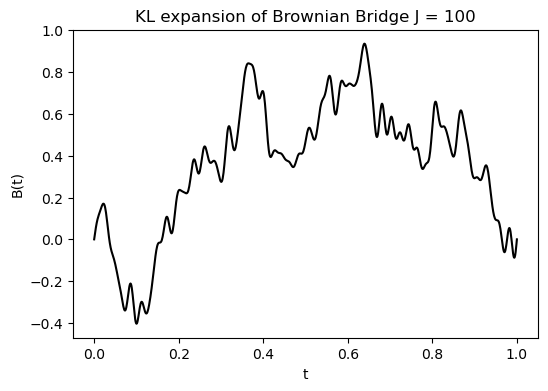

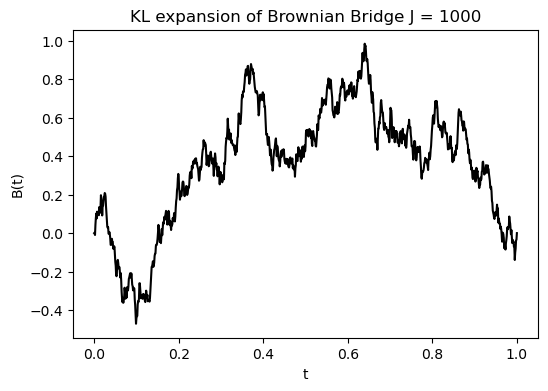

In [8]:
def KL_BrownianBridge(T, N, J, seed=None):
    t = np.linspace(0, T, N + 1)
    B = np.zeros(N + 1)
    j = np.arange(1, J+1)
    np.random.seed(seed)
    xi = np.random.randn(J)
    for i in range(N + 1):
        ti = t[i]
        Bt = sqrt(2)/(pi*j) * np.sin(j * pi * ti) * xi
        B[i] = np.sum(Bt)        
    return t, B
T = 1; N = 1000
J = 100
t, B = KL_BrownianBridge(T, N, J, 24)
Utils.Plot(t, B, 't', 'B(t)', f'KL expansion of Brownian Bridge J = {J}')
J = 1000
t, B = KL_BrownianBridge(T, N, J, 24)
Utils.Plot(t, B, 't', 'B(t)', f'KL expansion of Brownian Bridge J = {J}')

### Regularity
Sometimes we found that some stocchastic process is smooth, while the others are more oscillatory. So regularity is key to understand this. Here we can define the mean-square continuity and differentiabilty for real-valued processes.

An important theorem says that for a mean-zero process, the covariance function C is continuous at $(t,t)$ **iff** X(t) is mean-square continuous. So in particular if $C\in \mathcal{C}(\Tau \times \Tau)$, then $X(t)$ is mean-square continuous.

Another theorem talks about the mean-sqaure differentiability like, if $C\in \mathcal{C}^2(\Tau \times \Tau)$, then $X(t)$ is mean-square differrentiable $\frac{dX(t)}{dt}$ with covariance $\frac{\partial^2 C(s, t)}{\partial s \partial t}$.
#### Example
We take Exponential covariance and Gaussian covariance as an example:
$$\left\{\begin{aligned}
C_E(s, t) & = e^{-\frac{|s-t|}{l}}\\
C_G(s, t) & = e^{-\frac{(s-t)^2}{l^2}}
\end{aligned}\right.$$
We can vertify that the second derivative is not well-defined for Exponential, but well-defined for Gaussian. So the plots also tell us the Gaussian is much smoother, cause it is mean-differentiable. (We just use discrete KL expansion to simulate.)

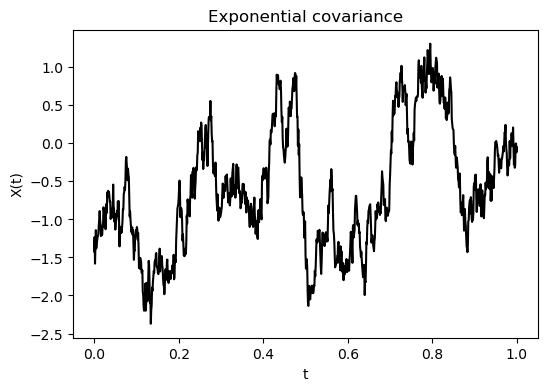

d:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


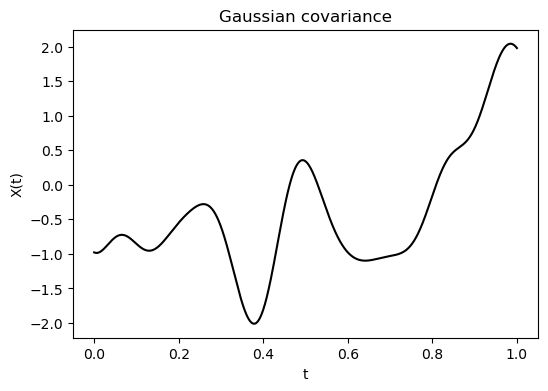

In [9]:
T = 1; N = 1000; l = 1/10
t, X = Utils.GP_Exponential_KL(T, N, l, 24)
Utils.Plot(t, X, 't', 'X(t)', f'Exponential covariance')
J = 1000
t, X = Utils.GP_Gaussian_KL(T, N, l, 24)
Utils.Plot(t, X, 't', 'X(t)', f'Gaussian covariance')

## Stationary Gaussian Process
Then we focus on a special kind of stochastic process called **Stationary Gaussian Process**. So an important characteristic is that the distribution wont change when t is translated. So the definition says that a stationary process is a stochastic process with mean function independent of t and covariance function $C(s, t)$ depends only on the difference $s-t$.  Therefore, the stationary covariance $c(t)$ is an even function. So, Brownian Motion is not stationary while Exponential and Gaussian covariance function talked above is stationary.

Similarly to the theorem talking about teh set of symmetrric, non-negative definite functions coincides with the set of covariance functions of second order stochastic process, `Bocher Theorem` and `Wiener-Khintchine Theorem` state that stationary covariance functions can be written as Fourier integrals. These two theorems is so important that we state them as follows:

`[Bochner Thm]`...

`[Wiener-Khintchine Thm]` ...

We note Wiener-Khintchine Thm as `WK THM`. So in WK thm, F is known to be spectral distribution and if it exists, the density f of F is the spectral density function. Then $c(t)=\sqrt{2}\check{f}(t)$. (If $c(t)$ is real-valued, then f must be even.) Alternatively, for a given function $c: \mathbf{R}\rightarrow \mathbf{R}$, $f(v) = \hat{c}(v)/\sqrt{2\pi}$. So if we can compute f from given c, and f is non-nagetive and integrable, then by WK thm, c(t) is a valid covariance function.

We can vertify that the Exponential, Gaussian, Whittle-Matern covariance is all valid by examing the $f(v)$.

### Example
We state an important case: Whittle-Matern covariance for we can construct processes with perticular regularity by choosing different parameters. It is very useful in application. So the covariance function is like: for $q>0$, 
$$...$$

So first we plot the covariance of WM, we notice that the larger q is, the slower c decays, the fater f decays.

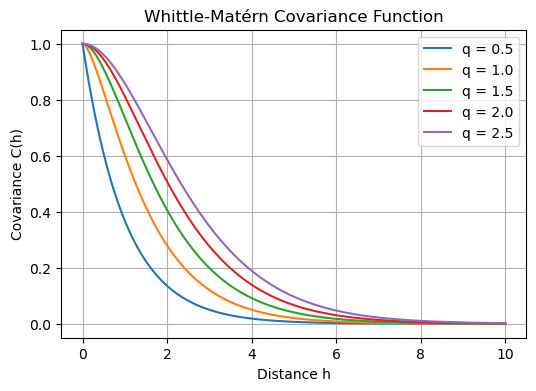

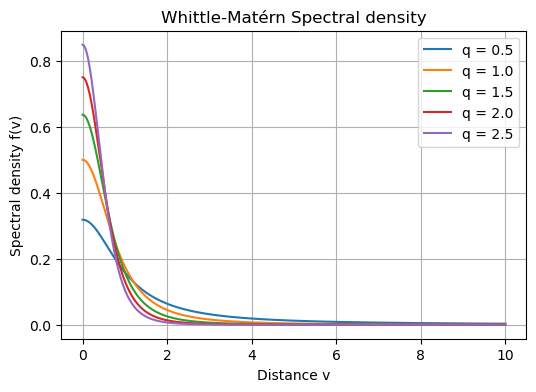

In [10]:
t = np.linspace(0, 10, 1000)
plt.figure(figsize=(6, 4))
for q in [0.5, 1.0, 1.5, 2.0, 2.5]:  # 平滑参数
    cov_values = Utils.Whittle_Matern_Cov(t, q)
    plt.plot(t, cov_values, label=f"q = {q}")

plt.title("Whittle-Matérn Covariance Function")
plt.xlabel("Distance h")
plt.ylabel("Covariance C(h)")
plt.legend()
plt.grid(True)
plt.show()


def Whittle_Matern_f(t, q):
    f = gamma(q + 0.5)/(gamma(q) * gamma(0.5)) /(1+t**2)**(q+0.5)
    return f

plt.figure(figsize=(6, 4))
for q in [0.5, 1.0, 1.5, 2.0, 2.5]:  # 平滑参数
    cov_values = Whittle_Matern_f(t, q)
    plt.plot(t, cov_values, label=f"q = {q}")

plt.title("Whittle-Matérn Spectral density")
plt.xlabel("Distance v")
plt.ylabel("Spectral density f(v)")
plt.legend()
plt.grid(True)
plt.show()

An important theorem states about the mean-square differentiability: 
`[Theorem]` ...

It vertifies that the faster f(v) decays, the smoother sample paths are. We plot some sample paths of mean zero Gaussian process with Whittle-Matern covariance with $q=1/2, 1, 3/2, 2$. Here we just use discrete KL expansion, though it is not an efficient way...; Later we will talk about a more efficient way using DFT.

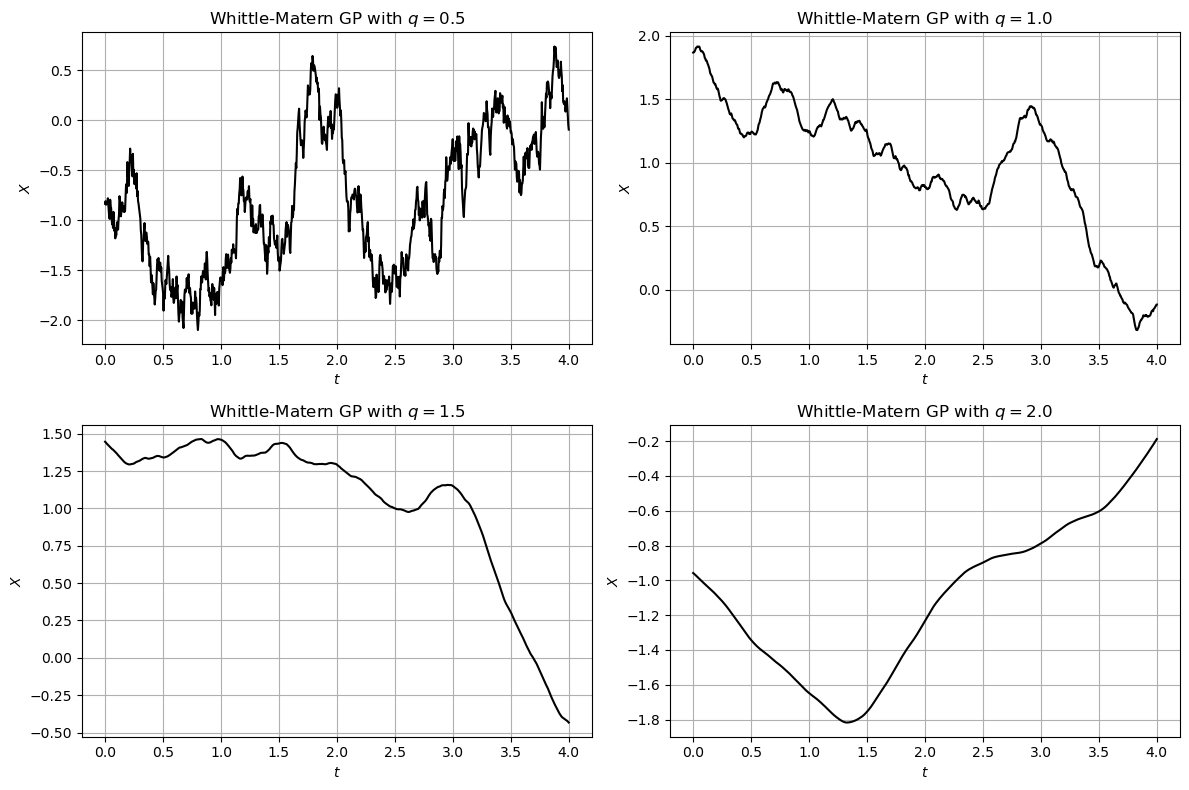

In [ ]:
q = [0.5, 1.0, 1.5, 2.0]
X = []
for i in range(len(q)):
    X.append(Utils.Gaussian_Whittle_Matern_KL(t, q[i], 24))
fig, axes = plt.subplots(2, 2, figsize=(8, 6)) 

for i, ax in enumerate(axes.flat):
    ax.plot(t, X[i], 'k-')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$X$')
    ax.set_title(fr'Whittle-Matern GP with $q = {q[i]}$')
    ax.grid(True)

plt.tight_layout()
plt.show()

Normally, we don't have the exact covariance function but data. But we can estimate the spectral density from a dataset.
...

### Complex-valued r.v. and process
Since the Fourier tansfromis key tool to analysis stationary process, we need to define the complex-valued r.v. and process. Suppose $Z = X + iY$ is a **complex-valued random variable**, which is a measurable function from $(\Omega, \mathcal{F})$ to $(C, \mathcal{B}(\mathbf{C}))$ with mean $\mu(Z)=E[Z]$, Covariance $Cov(Z_1, Z_2)=E[(Z_1-\mu_{Z_1})(Z_2-\mu_{Z_2})^*]$. So if $\mathbf{Z} = \mathbf{X} + i\mathbf{Y}$ is $\mathbf{}\mathbf{C}^d$ valued r.v., when X, Y are uncorrelated, $C_Z$ is a $d\times d$ rreal-valued matrix: $C_Z=C_X + C_Y$. Convversely, if $E[ZZ^*]$ and $E[ZZ^T]$ are $d\times d$ real-valued matrices, then X, Y are uncoorelated.

A complex-valued stochastic process is a set of complex-valued random variables $\{Z(t):t\in\Tau\}$ on a probability space $(\Omega, \mathcal{F}, P)$ with $\Tau \subset \mathbf{R}$. We say the process is second order if $Z(t)\in L^2(\Omega)$ for each $t\in \Tau$.

Then we can naturally define **Complex Gaussian Distribution** and **Complex (Gaussian) Process**. And we find that the real and image part of complex Gaussian Process is independent and each has covariance $C_Z(t)/2$, which can be used to generate independent sample paths. Then how can we generate (Stationary) Complex Gaussian Process?

First we can define the **stochastic Fourrier integral process**. Then a theorem says that: for an integrable and even function $f:\mathbf{R}\rightarrow \mathbf{R}$, the corresponding stochastic Fourier integral process $Z(t)$ is a stationary complex Gaussian Process with mean zero and covariance $2c(t)$, which is the inverse Fourier transform of f mentioned above. This means that we can generate independent sample paths by generating complex process $Z(t)$. So why we want to consider complex process instead of real-valued process? The reason is that `Fourier Transform` is much faster than (Discrete) KL expansion.

#### Example
So the stochastic Fourier integral provides a natrual route to approxiamte $Z(t)$. Then we may think about how to approximate $Z(t)$ numerically. As the integral is over the ral line, then narrow to a finite invterval $[-R, R]$, having $Z_R(t)$. 

First, we use quadrature rule finally to approximate $Z_R(t)$, giving $\tilde{Z}_R(t)$. 

Take Sinc covariance as an example:
...

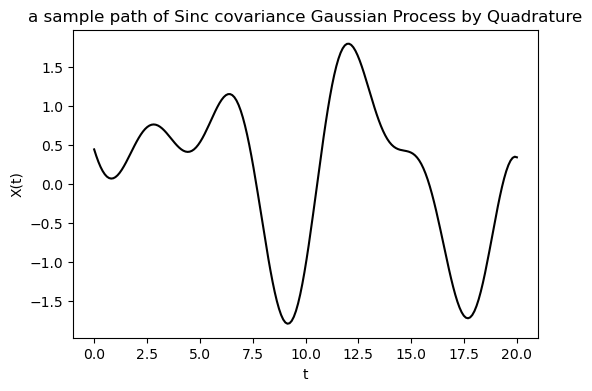

In [11]:
def Quadrature_Sinc(t, J, l):
    '''
    J is the number of points in [-R, R]
    '''
    R = pi / l
    step = 2 * R / J
    Z = np.exp(-1j * t * R) * np.dot(np.random.randn(2), [1,1j]) / sqrt(2)
    for i in range(1, J):
        Z += np.exp(1j * t * (- R + i * step)) * np.dot(np.random.randn(2),[1,1j])
    Z += np.exp(1j * t * R) * np.dot(np.random.randn(2) , [1,1j]) / sqrt(2)
    Z = Z * sqrt(l/(2*pi)) * sqrt(step)
    return Z
t = np.linspace(0, 20, 200)
Z = Quadrature_Sinc(t, 100, 2)
Utils.Plot(t, np.real(Z), 't', 'X(t)', 'a sample path of Sinc covariance Gaussian Process by Quadrature')

However we find that $\tilde{Z}_R(t)$ can be fast evaluated by DFT. The total cost of this is $O(NM +NMlogN)$ while the above is $O(N^2M)$. Let alone the discrete KL expansion. We can see this method is much faster.

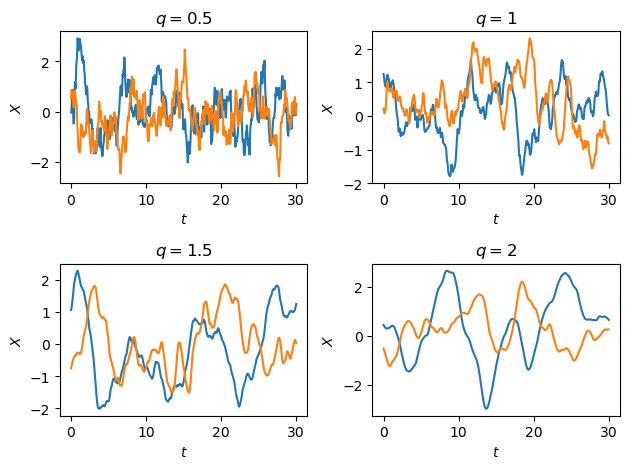

In [12]:
def squad(T, N, M, fhandle):
    dt = T / (N - 1)   
    t = np.linspace(0,T,N)
    R = pi / dt    
    dnu = 2 * pi / (N * dt * M)
    Z = np.zeros(N)    
    coeff = np.zeros(N,dtype='complex128')
    for m in range(M):
        for k in range(N):
            nu = - R + ((k - 1) * M + (m - 1)) * dnu
            xi = np.dot(np.random.randn(2),[1,1j])
            coeff[k] = sqrt(fhandle(nu) * dnu) * xi
            if ((m == 1 and k == 1) or (m == M and k == N)):
                coeff[k]=coeff[k] / sqrt(2)
        Zi = N *np.fft.ifft(coeff)
        Z = Z + np.exp(1j * (- R + (m - 1) * dnu) * t)*Zi
    return t,Z

def interp_quad(s, N, M, fhandle):
    T = np.max(s) - np.min(s)
    t,Z = squad(T, N, M, fhandle)
    Zr = np.real(Z);    X = np.interp(s, t + np.min(s), Zr)
    Zi = np.imag(Z);    Y =np.interp(s, t + np.min(s), Zi)
    return X,Y

def quad_wm(s, N, M, q):
    X, Y = interp_quad(s, N, M, lambda nu: f_wm(nu,q))
    return X, Y

from numba import jit, float64
@jit([float64(float64,float64)])
def f_wm(nu,q):      
    const = gamma(q + 0.5) / (gamma(q) * gamma(0.5))
    f = const / ((1 + nu * nu) ** (q + 0.5))
    return f

T=30;    N=2**9
t=np.linspace(0,T,N)
M=N//4
vector_q=[0.5,1,1.5,2]
for i in range(1,5):
    q=vector_q[i-1]
    X,Y=quad_wm(t,N,M,q)
    plt.subplot(2,2,i)
    plt.plot(t,X)
    plt.plot(t,Y)
    s=plt.title('$q=$'+str(q))
    s=plt.xlabel(r'$t$')
    s=plt.ylabel(r'$X$')
plt.tight_layout() 

### Circulant Embedding
Let X(t) be a mean-zero stationary Gaussian process. The quadrature method described above provides samples of $X(t)$ on a time interval $[0,T]$ that are approximate. We develop an exact method for sampling $X(t)$ at uniformly spaced sample times $t_n = n\Delta t$ for $n = 0, \cdots, N − 1$ known as the circulant embedding method. If it is required to sample X(t) at non-uniformly spaced times $t = s_1, \cdots, s_P$, linear interpolation can also be applied. Because the interpolation is based on samples from the correct distribution, the method is more accurate than the quadrature method.

An important theorem says that: If C is a $N\times N$  real-valued circulant matrix with first column $c_1$, then $C=WDW^*$, where W is Fourier Matrix and diagonal D with entries $d=\sqrt{N}W^*c_1$. This theorem provide us a fast way to sample by covariance matrix, similarly to discrete KL expansion mentioned before.

So when we want to drraw samples from $N(0, N)$, where C is a $N\times N$  real-valued circulant covariance matrix. Since C must be symmetric and non-negative definite, we can efficiently sample by DFT. However the covariance matrix is not always circulant, it is often like a Toeplitz matrix, providing the spaced time is uniformly taken. Then we developed a minimal circulant embedding method to extend Toeplitz matrix to Circulant matrix. 

#### Example
Take a Gaussian Process with Exponential covariance as an example. We can verrtify that the minimal circulant extension is always non-negative definite for exponential covariance.

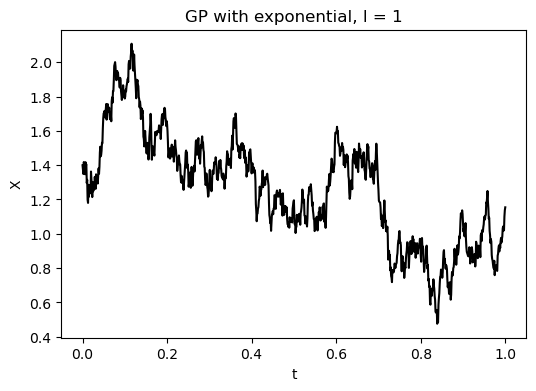

In [13]:
T = 1; N = 1000; l = 1
t = np.linspace(0, T, N + 1)
X, Y = Utils.Circlulant_Exponential(t, l)
Utils.Plot(t, X, 't', 'X', f'GP with exponential, l = {l}')

In some cases, the minimal circulant extension matrix is not non-negative definite, something goes wrong when we factorize $\tilde{C}$. Normally, We can avoid the nagative eigenvalues by embedding C into a larger Circulant matrix by padding in many cases. 

Here we consider the WM covariance. We can plot the $\rho(D_{-})$ with $N+M$. We find that $\rho(D_{-})$ turns to 0 when $N+M\approx 7N$.

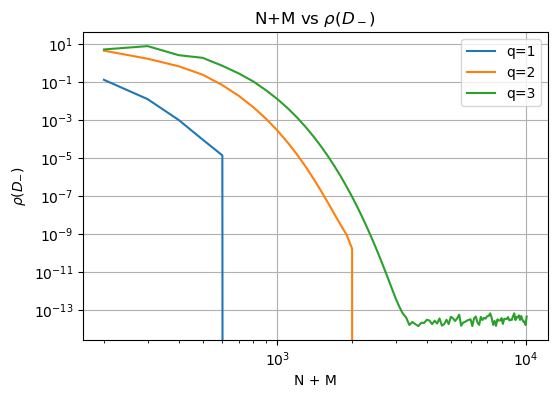

In [4]:
N=100; M=9900
T = 1
dt = 1/(N - 1)
plt.figure(figsize=(6, 4))
for q in [1, 2, 3]:
    NM, rho = Utils.rho_WM(N, dt, q)
    plt.loglog(NM, rho, label=f'q={q}')
plt.title(r"N+M vs $\rho(D_-)$")
plt.xlabel("N + M")
plt.ylabel(r'$\rho(D_{-})$')
plt.legend()
plt.grid(True)
plt.show()

So padding method involves amount of work. Hence we turn to **approximate circulant embeddind** instead. We just consider $\tilde{Z_1}=WD_+^{1/2}\xi$, having covvariance $\tilde{C}+\tilde{C_-}$. when the norm of $\tilde{C_-}$ is small, that is a good approximation.


rho(D_minus) = 3.2874e-13


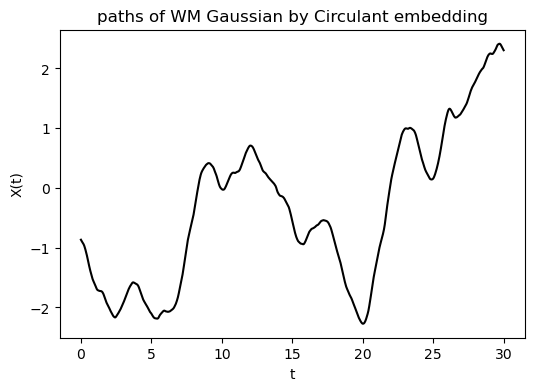

In [5]:
N=100000; M=0; T = 30
dt = T/(N - 1)
t, X, Y, c = Utils.Circulant_Approx_WM(N, M, dt, 2)
Utils.Plot(t, X, 't', 'X(t)', 'paths of WM Gaussian by Circulant embedding')

## Random Fields
Since the random fields is the basis of SPDE, we will talk about stationary Gaussian random fields and isotropic fields.
For a set $D \subset \mathbf{R}^d$, a (real-valued) random field ${u(x) : x \in D}$ is a set of real-valued random variables on a probability space $(\Omega, \mathcal{F}, \mathbf{P})$. Then if $u(x)\in L^2(\Omega)$ for $\forall x\in D$, call ${u(x) : x \in D}$ is second-order random field. Similarly we also talk about the mean-square regularity of random fields. Then we can define **Gaussian Random Fields** which can be uniquely determined by its mean and covariance function. 
### Example 
Take Brownian Sheet as an example.

In [ ]:
import numpy as np
import Utils
import matplotlib.pyplot as plt

### Circulant embedding in two dimensions
This Game trick is the same as circulant embedding in stochastic process. We have a theorem states about the Fourrier representation of BCCB matrix. So we can speed up the sampling process by FFT. Normally our covariance matrix is not BCCB matrix, but a BTTB matrix. So we try to embed the BTTB matrix into a BCCB matrix
#### Example
1.For GP with Exponential covariance 

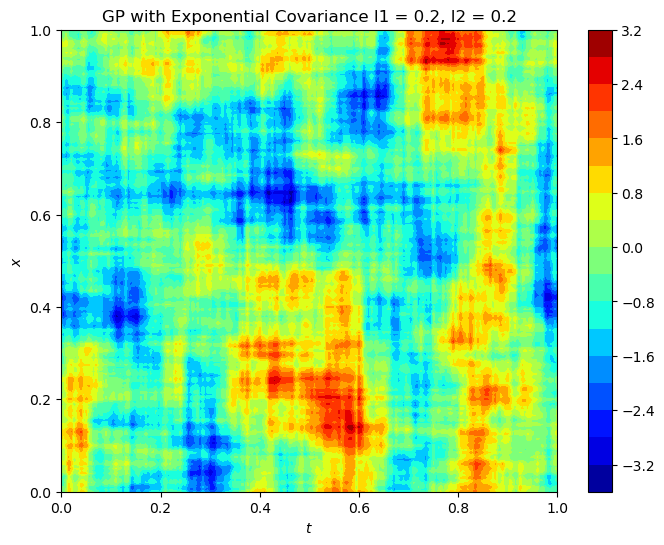

In [ ]:
n1 = 201; n2 = 201; l1 = l2 = 1/5
x=np.linspace(0, 1, n1)
y=np.linspace(0, 1, n2)
fhandle1=lambda x1,x2:Utils.sep_exp(x1, x2, l, l)
C_red = Utils.Reduced_Cov(n1, n2, 1/200, 1/200, fhandle1)
u1, u2 = Utils.Circulant_Embed_Sample_2d(C_red, n1, n2)
fig, ax = Utils.Plot_contourf(x, y, u1, 20, 'jet', f'GP with Exponential Covariance l1 = {l1}, l2 = {l2}')

2. GP with Gaussian covariance function
In some cases, the embeded matrix is not always non-negative definite. Then we use padding to enlarge the BCCB matrix.

First we test the circulant embedding without padding.

rho(D_minus)=0.12928460609511752
(513, 257)


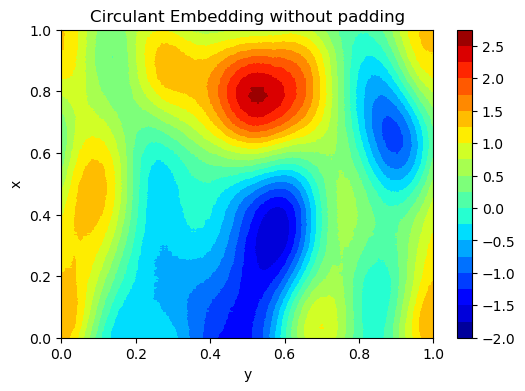

In [1]:

fhandle = lambda x1,x2:Utils.gaussA_exp(x1,x2,10,10,0)
n1=513; n2=257; m1=0; m2=0; dx1=1/(n1-1); dx2=1/(n2-1)
C_red = Utils.Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle)
u1, u2 = Utils.Circulant_Embed_Approx_2d(C_red,n1,n2,m1,m2)
print(u1.shape)
#
x=np.linspace(0,1,n1); y=np.linspace(0,1,n2)
fig, ax = Utils.Plot_contourf(y, x, u1, xlabel='y', ylabel='x' ,name='Circulant Embedding without padding')

We find that the eigenvalue of negative matrix is large. So we try Circulant embedding with padding.

In [ ]:
n1=257; n2=257; 
m1 = 8*n1; m2 = 8*n2; dx1=1/(n1-1); dx2=1/(n2-1)
C_red = Utils.Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle)
u1, u2 = Utils.Circulant_Embed_Approx_2d(C_red,n1,n2,m1,m2)
x=np.linspace(0,1,n1); y=np.linspace(0,1,n2)
fig, ax = Utils.Plot_contourf(y, x, u1, xlabel='y', ylabel='x' ,name='Circulant Embedding with padding')

3. Consider two GP with Gaussian covariance function, one is additive noise and the other is multiplitive. We have a test about 
$$A1 = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}$$
and
$$A2 = \begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}$$
We find that A1 is isotropic and A2 is not.

In [ ]:
fhandle1=lambda x1,x2:Utils.gaussA_exp(x1,x2,1,1,0)
fhandle2=lambda x1,x2:Utils.gaussA_exp(x1,x2,1,1,0.8)
#
T = 10
n1=257; n2=257; m1=8*n1;m2=8*n2; 
dx1 = T/(n1-1); dx2 = T/(n2-1)
C_red1 = Utils.Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle1)
C_red2 = Utils.Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle2)
u1, _ = Utils.Circulant_Embed_Approx_2d(C_red1,n1,n2,m1,m2)
u2, _ = Utils.Circulant_Embed_Approx_2d(C_red2,n1,n2,m1,m2)
x = np.linspace(0, T, n1); y = np.linspace(0, T, n2)
fig, ax = Utils.Plot_contourf(y, x, u1, xlabel='y', ylabel='x' ,name='Circulant Embedding with padding A_1')
fig, ax = Utils.Plot_contourf(y, x, u2, xlabel='y', ylabel='x' ,name='Circulant Embedding with padding A_2')

### KL Expansion of Random Fields
The KL expansion of random fields is similar to that of stochastic process.
#### Example
Here we take 2D seperable exponential covariance function as an example.

#### Approximation numerically
Also we can approximate eigenvalue and eigenfunctions by collocation methods and Galerkin methods.

## SPDE with random data
After we can handle the random fields,we can consider SPDE with random data. Here we main focus on the elliptic BVP on a domain $D\subset \mathbf{R}^2$:
\begin{equation}
\begin{aligned}
&-\nabla\cdot (a(x, w)\nabla u(x))=f(x, w)& x\in \Omega\\
&u(x)=g(x)& x\in \partial \Omega
\end{aligned}
\end{equation}
Assume that $\{a(x, w) : x \in D\}$ and $\{ f (x, w) : x \in D\}$ are second-order random ﬁeld. Then the solution is a random field as well. For this kind of SPDE, we call it SPDE with random data.

### MCFEM
The simplest idea is using Monte Carlo Method to Q FEM problems based on the variational formulation on D. 
#### Example
1. Consider 1D linear equation with $a(x, w)=...$

In [4]:
import numpy as np
import Utils
import matplotlib.pyplot as plt

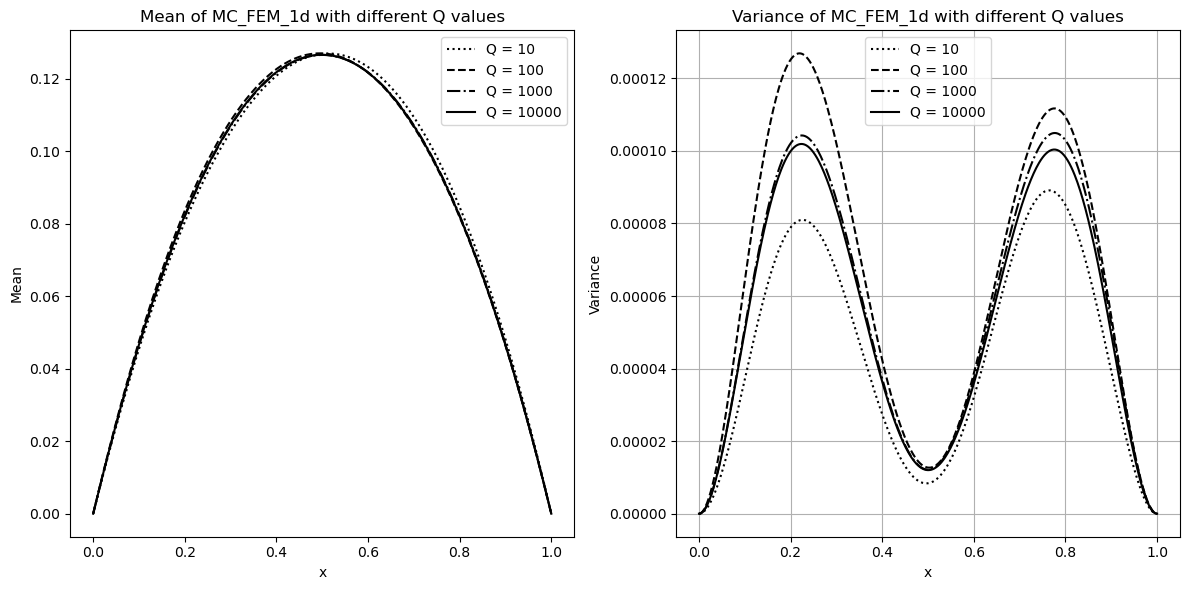

In [3]:
ne = 512
x = np.linspace(0, 1, ne + 1)
Q_values = [10, 100, 1000, 10000]
linestyles = ['dotted', 'dashed', 'dashdot', 'solid']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for Q, linestyle in zip(Q_values, linestyles):
    mean, var = Utils.MC_FEM_1d(ne, 4, 1, 10, Q)
    ax1.plot(x, mean, linestyle=linestyle, color='k', label=f'Q = {Q}')
    ax2.plot(x, var, linestyle=linestyle, color='k', label=f'Q = {Q}')

ax1.set_title('Mean of MC_FEM_1d with different Q values')
ax1.set_xlabel('x')
ax1.set_ylabel('Mean')
ax1.legend()

ax2.set_title('Variance of MC_FEM_1d with different Q values')
ax2.set_xlabel('x')
ax2.set_ylabel('Variance')
ax2.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

2. Consider 2D MC FEM problems
So first we have a test on isotropic covariance function. It should be noted that a(x) here is apprroximated by Circulant embedding, with padding sometimes.

In [2]:
ns = 50; n = ns + 1
Q = 1000; alpha = 0; l = 0.25
xv, yv, mean, var = Utils.MC_FEM_2D(ns, Q, l, alpha)

rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.969284071375626e-06
rho(D_minus)=2.96928

Then we have the warning that the samples are not exact. So next we use padding. This time the solution is much more accurate.

rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.143476790314682e-14
rho(D_minus)=5.14347

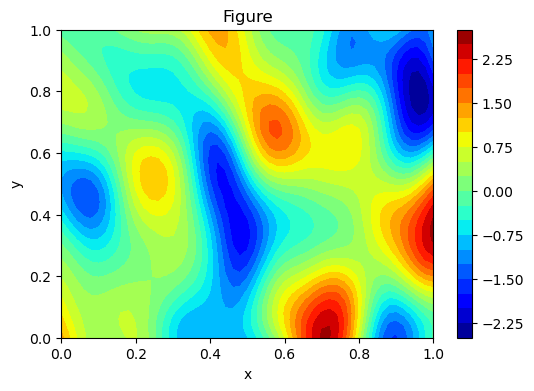

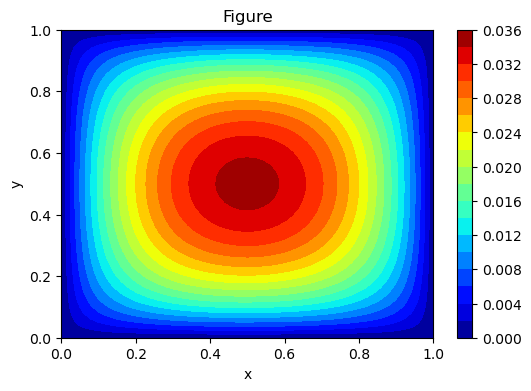

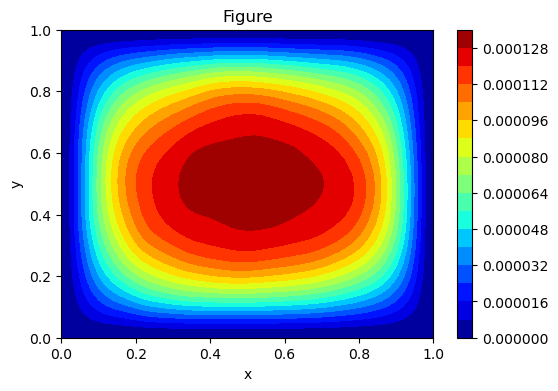

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Figure'}, xlabel='x', ylabel='y'>)

In [2]:
ns = 50; n = ns + 1
Q = 10000; alpha = 1; l = 0.25
xv, yv, mean, var, z = Utils.MC_FEM_2D(ns, Q, l, alpha); 
X = xv.reshape((n, n))
Y = yv.reshape((n, n))
mean = mean.reshape((n, n))
var = var.reshape((n, n))
z = z.reshape((n, n))
Utils.Plot_contourf(X, Y, z)
Utils.Plot_contourf(X, Y, mean)
Utils.Plot_contourf(X, Y, var)


now fix = 0.1. Choosing a smaller correlation length has two consequences. First, we need to choose a smaller value of h to ensure the data error does not dominate the finite element error. For example, h = 1/128 gives h/l = 12.8. Second, padding is not necessary as the covariance error is $O(10^{−14})$ when we set $\alpha = 0$.

rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.998659821432499e-14
rho(D_minus)=4.99865

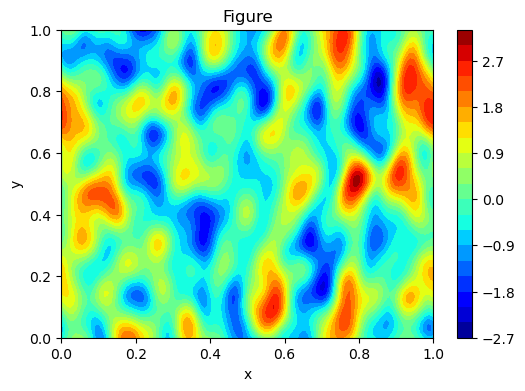

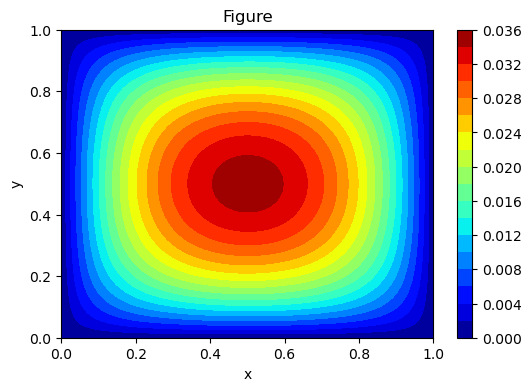

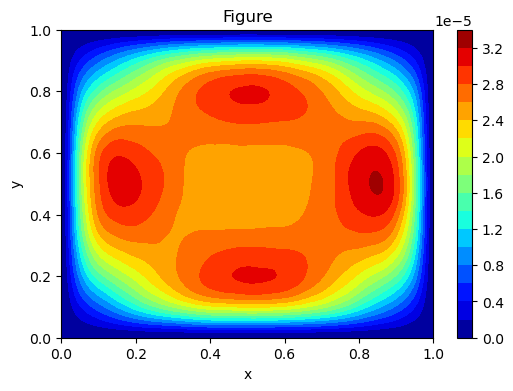

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Figure'}, xlabel='x', ylabel='y'>)

In [3]:
ns = 128; n = ns + 1
Q = 10000; alpha = 0; l = 0.1
xv, yv, mean, var, z = Utils.MC_FEM_2D(ns, Q, l, alpha); 
X = xv.reshape((n, n))
Y = yv.reshape((n, n))
mean = mean.reshape((n, n))
var = var.reshape((n, n))
z = z.reshape((n, n))
Utils.Plot_contourf(X, Y, z)
Utils.Plot_contourf(X, Y, mean)
Utils.Plot_contourf(X, Y, var)

We can analysis the error and the computation cost is about $O(\epsilon ^{-4})$ disappointingly. Then we consider the variational formualtion on $D\times \Omega$ 
### SGFEM
We now derive an alternative variational formulation by working on $D \times \Omega$ and seeking weak solutions $u : D \times \Omega \rightarrow R$. It is natural to search for u in $L^2(\Omega, H_g^1(D))$ s.t. $$a(u, v) = l(v),\forall v\in V=L^2(\Omega, H^1_0(D))$$, where
\begin{equation}
\begin{aligned}
&a(u, v)  :=\mathbb{E}\left[\int_{D} a(\boldsymbol{x}, \cdot) \nabla u(\boldsymbol{x}, \cdot) \cdot \nabla v(\boldsymbol{x}, \cdot) d \boldsymbol{x}\right], \\
&\ell(v)  :=\mathbb{E}\left[\int_{D} f(\boldsymbol{x}, \cdot) v(\boldsymbol{x}, \cdot) d \boldsymbol{x}\right] .
\end{aligned}
\end{equation}

Now wew consider using trruncated KL expansion to approximate the $a(x)$ and $f(x)$. Assume a(x), f(x) havve the mean $\mu_{a}, \mu_{f}$ and covariance
\begin{equation}
\begin{aligned}
&C_{a}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right):=\mathbb{E}\left[\left(a\left(\boldsymbol{x}_{1}\right)-\mu_{a}\left(\boldsymbol{x}_{1}\right)\right)\left(a\left(\boldsymbol{x}_{2}\right)-\mu_{a}\left(\boldsymbol{x}_{2}\right)\right)\right], \\
&C_{f}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right):=\mathbb{E}\left[\left(f\left(\boldsymbol{x}_{1}\right)-\mu_{f}\left(\boldsymbol{x}_{1}\right)\right)\left(f\left(\boldsymbol{x}_{2}\right)-\mu_{f}\left(\boldsymbol{x}_{2}\right)\right)\right] .
\end{aligned}
\end{equation}
Then we can expand the origin as:
\begin{equation}
\begin{aligned}
&a(x, \omega)=\mu_{a}(x)+\sum_{k=1}^{\infty} \sqrt{v_{k}^{a}} \phi_{k}^{a}(x) \xi_{k}(\omega) \\
&f(x, \omega)=\mu_{f}(x)+\sum_{k=1}^{\infty} \sqrt{v_{k}^{f}} \phi_{k}^{f}(x) \eta_{k}(\omega)
\end{aligned}
\end{equation} 


Normally we dont have the explicit eigenpairrs of covariance. So usually we need to apply numerical methods to approximate them. Here we introduce two KL expansions with explicit eigenpairs that leads to random fields with covariance functions close to a target covariance (whose eigenpairs are not known explicitly).

...

So after we approximate the random fields $a(x, w)$ and $f(x, w)$, we still cannot deal with the variational form of $D\times \Omega$ since $\Omega$ is a abstract set involving probability measure P. So we define the finite dimensional noise $\xi \in \Gamma$. 

Define $L_{p}^{2}\left(\Gamma, H_{g}^{1}(D)\right):=\left\{v: D \times \Gamma \rightarrow \mathbb{R}: \int_{\Gamma} p(y)\|v(\cdot, y)\|_{H^{1}(D)}^{2} d \boldsymbol{y}<\infty \text { and } \gamma v=g\right\}$

and similarly for  $L_{p}^{2}\left(\Gamma, H_{0}^{1}(D)\right)$ . So the weak solution to the BVP on  $D \times \Gamma$  is a function  $\tilde{u} \in W:=L_{p}^{2}\left(\Gamma, H_{g}^{1}(D)\right)$  satisfying
\begin{equation}
\tilde{a}(\tilde{u}, v)=\tilde{\ell}(v), \quad \forall v \in V:=L_{p}^{2}\left(\Gamma, H_{0}^{1}(D)\right)
\end{equation}

where  $\tilde{a}: W \times V \rightarrow \mathbb{R}$  and  $\tilde{\ell}: V \rightarrow \mathbb{R}$  are defined by
\begin{equation}
\begin{aligned}
\tilde{a}(u, v) & :=\int_{\Gamma} p(\boldsymbol{y}) \int_{D} \tilde{a}(\boldsymbol{x}, \boldsymbol{y}) \nabla u(\boldsymbol{x}, \boldsymbol{y}) \cdot \nabla v(\boldsymbol{x}, \boldsymbol{y}) d \boldsymbol{x} d \boldsymbol{y}, \\
\tilde{\ell}(v) & :=\int_{\Gamma} p(\boldsymbol{y}) \int_{D} \tilde{f}(\boldsymbol{x}, \boldsymbol{y}) v(\boldsymbol{x}, \boldsymbol{y}) d \boldsymbol{x} d \boldsymbol{y} .
\end{aligned}
\end{equation}


The weight  $p: \Gamma \rightarrow \mathbb{R}^{+}$ is the joint density of  $\boldsymbol{\xi}=\left[\xi_{1}, \ldots, \xi_{M}\right]^{\top}$  where  $M:=\max \{P, N\}$  and  $\xi: \Omega \rightarrow \Gamma \subset \mathbb{R}^{M}$ .

After we have $\Gamma$, we simiarly need to define the basis function for $\Gamma$, say $S^k = span\{\psi_1,\cdots, \psi_Q\}$. Then The space $V^{hk} will serve as our test space:
\begin{equation}
V^{hk}=V^{h} \otimes S^{k}:=\operatorname{span}\left\{\phi_{i} \psi_{j}: i=1, \ldots, J, j=1, \ldots, Q\right\}
\end{equation}

Then expansion of u in terms of polynomials is called **Generalized Polynomial Chaos(gPC)**, which is often used in Uncertainty Quantification(UQ). We can rewrite $w$ in $W^{h k}$, where $W^{h k}:=V^{h k} \oplus \operatorname{span}\left\{\phi_{J+1}, \ldots, \phi_{J+J_{b}}\right\} .
$ as 
\begin{equation}
w(\boldsymbol{x}, \boldsymbol{y})=\sum_{i=1}^{J} \sum_{j=1}^{Q} w_{i j} \phi_{i}(\boldsymbol{x}) \psi_{j}(\boldsymbol{y})+\sum_{i=J+1}^{J+J_{b}} w_{i} \phi_{i}(\boldsymbol{x})=: w_{0}(\boldsymbol{x}, \boldsymbol{y})+w_{g}(\boldsymbol{x})
\end{equation}

Here we use polynomials of total degree k or less as: $S^{k}=\operatorname{span}\left\{\prod_{i=1}^{M} P_{\alpha_{i}}^{i}\left(y_{i}\right): \alpha_{i}=0,1, \ldots, k, i=1, \ldots, M,|\boldsymbol{\alpha}| \leq k\right\}$, where $\alpha=\sum_{i=1}^{M}, Q:=\operatorname{dim}\left(S^{k}\right)=\frac{(M+k)!}{M!k!}$. We can shoose different complete polynommials by different $\Gamma, y_i$. 
![gPC](gPC_list.png)

So since $\tilde{u}_{hk}\in W^{hk}$, then with $\psi_1 = 1$, we have
\begin{equation}
\begin{aligned}
\tilde{u}_{h k}(\boldsymbol{x}, \boldsymbol{y})&=\sum_{i=1}^{J} \sum_{j=1}^{Q} u_{i j} \phi_{i}(\boldsymbol{x}) \psi_{j}(\boldsymbol{y})+w_{g}(\boldsymbol{x})\\
&=\left(u_{1}(\boldsymbol{x})+w_{g}(\boldsymbol{x})\right) \psi_{1}(\boldsymbol{y})+\sum_{j=2}^{Q} u_{j}(\boldsymbol{x}) \psi_{j}(\boldsymbol{y})
\end{aligned}
\end{equation}

Then the mean and covariance can be estimated as 
\begin{equation}
\begin{aligned}
&E[\tilde{u}_{hk}]=u_1+w_g \\
&Var(\tilde{u}_{hk}) = \sum_{j=2}^Q u_j^2
\end{aligned}
\end{equation}

Since we have the expansion, we have **Stochastic Galerkin Linear system**. So first of all, we need to evaluate the value of $a(x, w)$ and $f(x, w)$ by KL expansion. Then we need to assamble the finite element component and stochastic component.

## SODE
Before we continue the time-dependent SPDE, we need to know how to solve SODE to deal with time.
### Example
1. Ornstein-Uhlenbeck process

In [ ]:
def OrnUhl(u0, T, N, lam, sigma):
    t, u = Utils.EulerMaruyama(u0, T, N, 1, 1, lambda u: -lam * u, lambda u: sigma)
    return t, u

lam=1; sigma=0.5
u0=np.array([1])
dt = 0.05
T=20
N=int(T/dt)
[t,u]=OrnUhl(u0,T,N,lam,sigma)

2. Duffing -van der Pol equation

In [ ]:
@jit
def vanderpol_f(u, lam, alpha):
    Q = u[0]; P = u[1]
    f = np.array([P, -P*(lam + Q**2)+alpha*Q-Q**3])
    return f

@jit
def vanderpol_G(u, sigma):
    Q = u[0]; P = u[1]
    G = np.array([0, sigma * Q])
    G = G.reshape(-1,1)
    return G

def vanderpol(u0, T, N, lam, alpha, sigma):
    t,u = Utils.EulerMaruyama(u0, T, N, 2, 1, lambda u: vanderpol_f(u, lam, alpha), lambda u: vanderpol_G(u, sigma))
    return t, u

lam=1; alpha=1; sigma=1;
u0=np.array([0.5, 0])
T=10
N=1000
[t,u]=vanderpol(u0,T,N,alpha,lam,sigma)

3. Geometric Brownian Motion

### Euler-Maruyama method

### Milstein method

### Stratonovich Integrals



## time-dependent SPDE
Then we come to the time-dependent SPDE. We study the stochastic semilinear evolution equation:
$$du = [\Delta u + f(u)]dt + G(u)dW(t, x)$$
Simmilar to normal time-dependent PDE, we treat SPDE like this as semilinear SODEs on a Hilbert space, like
$$du = [-Au+f(u)]dt + G(u)dW(t)$$
where −A is a linear operator that generates a semigroupwhere −A is a linear operator that generates a semigroup $S(t)=e^{-tA}$. 

So like we deal with integration of stochastic process like Itos or stratonovich, we need to generalize the Brownian Motion by introducing spatial variable to W(t). Here we define Q-Wiener Process. 
### Q wiener process
So, in place of $L^2(D)$, we develop the theory on a separable Hilbert space U with norm $\|\cdot\|_U$ and inner product $\langle \cdot, \cdot\rangle _U$ and define the Q-Wiener process ${W (t) : t \geq 0}$ as a U-valued process. 

We should state some assummmption and facts about Q: $Q \in \mathscr(U)$ is non-negative definite and symmetric. Further, Q has an orthonormal basis $\{ \mathcal{X}_j : j \in \mathcal{N}\}$ of eigenfunctions with corresponding eigenvalues $q_j \geq 0$  such that $\sum_{j\in\mathcal{N}} q_j < \infty$ (i.e., Q is of trace class).

So then $W(t)$ is a Q-Wiener process IFF $W(t)=\sum_{j=1}^\infty \sqrt{q_j}\mathcal{X}_j\beta_j(t)$ where $\beta_j(t)$ are iid $\mathcal{F}_t$-Brownian motions and the series converges in $L^2(\Omega,U)$.

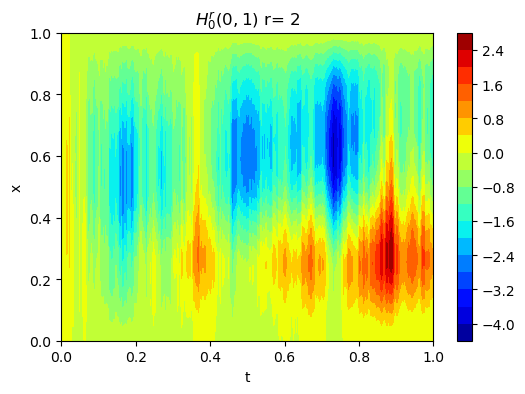

In [6]:
dtref=0.01; kappa=1000; r=2; J=128; a=1
WW=np.zeros((J+1,kappa + 1))
t=np.linspace(0, 1, kappa + 1)
x = np.linspace(0, a, J + 1)
bj = Utils.Get_onedD_bj(dtref, J, a, r)
for k in range(kappa):
  dW = Utils.Get_onedD_dW(bj, 1, 0, 1)
  WW[1:-1, k+1] = WW[1:-1, k] + dW
[T,X]=np.meshgrid(t, x)
fig, ax = Utils.Plot_contourf(T, X, WW, xlabel='t', ylabel='x', name=rf'$H_0^{{r}}(0, {a})$ r= {r}')

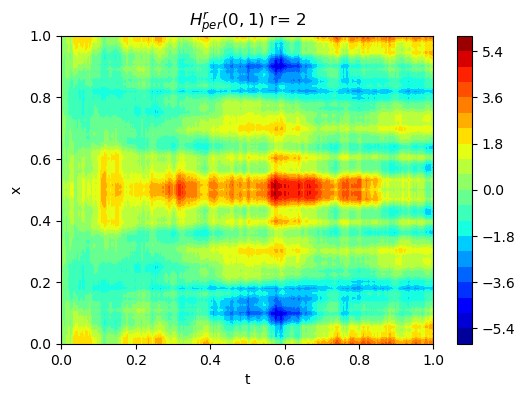

In [18]:
dtref=0.01; kappa=1000; r=2; J=128; a=1
WW=np.zeros((J+1,kappa + 1))
t=np.linspace(0, 1, kappa + 1)
x = np.linspace(0, a, J + 1)
bj = Utils.Get_onedP_bj(dtref, J, a, r)
for k in range(kappa):
  dW = Utils.Get_onedP_dW(bj, 1, 0, 1)
  WW[0:-1, k+1] = WW[0:-1, k] + dW
  WW[-1, k + 1] = WW[0, k + 1]
[T,X]=np.meshgrid(t, x)
fig, ax = Utils.Plot_contourf(T, X, WW, xlabel='t', ylabel='x', name=rf'$H_{{per}}^{{r}}(0, {a})$ r= {r}')

(1, 512, 512)


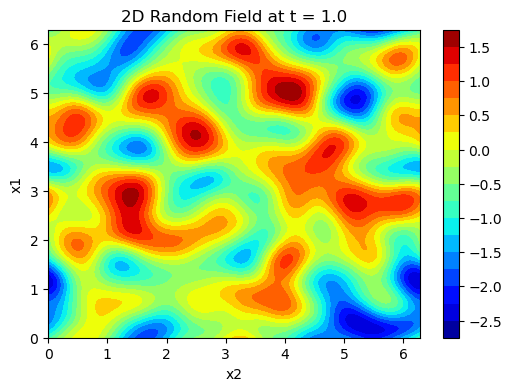

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': '2D Random Field at t = 1.0'}, xlabel='x2', ylabel='x1'>)

In [8]:
J=[512, 512]; dtref=0.01; kappa=100; a=[2*pi, 2*pi]
alpha=0.05; 
bj = Utils.Get_twod_bj(dtref, J, a, alpha)
W1, W2 = Utils.Get_twod_dW(bj, kappa, 1)
print(W1.shape)
gridx = np.linspace(0, a[0], J[0])
gridy = np.linspace(0, a[1], J[1])
Utils.Plot_contourf(gridy, gridx, W1[0, :, :], xlabel='x2', ylabel='x1', name=f'2D Random Field at t = {kappa * dtref}')

In [2]:
J=[512, 512]; dtref=0.01; kappa=100; a=[2*pi, 2*pi]
W = np.zeros((J[0], J[1], kappa))
t = np.linspace(0, 1, kappa + 1)
alpha = 0.5
bj = Utils.Get_twod_bj(dtref, J, a, alpha)
W1, W2 = Utils.Get_twod_dW(bj, 1, 1)
W[:, :, 0] = W1[0, :, :]
W[:, :, 1] = W[:, :, 0] + W2[0, :, :]
for k in range(1, kappa//2):
    W1, W2 = Utils.Get_twod_dW(bj, 1, 1)
    W[:, :, 2 * k] = W[:, :, 2 * k - 1] + W1[0, :, :]
    W[:, :, 2 * k + 1] = W[:, :, 2 * k] + W2[0, :, :]

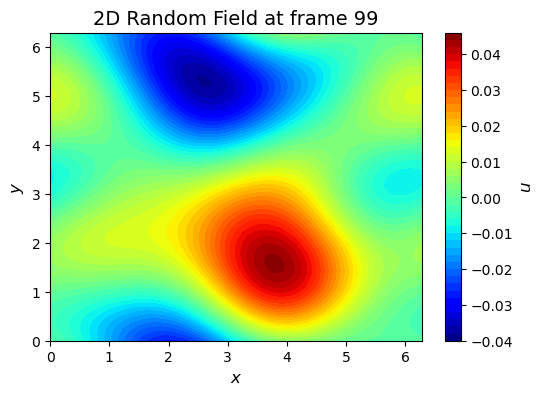

In [3]:
gridx1 = np.linspace(0, a[0], J[0])
gridx2 = np.linspace(0, a[1], J[1])
Utils.Generate_GIF(gridx2, gridx1, W, xlabel='x2', ylabel='x1', name='2D Random Field')

### Cylindrical Wiener Process
We mention the important case of Q = I, which is not trace class on an infinite-dimensional space U (as $q_j = 1$ for all j) so that the series does not converge in $L^2(\Omega,U)$ . To extend the definition of a Q-Wiener process, we introduce the cylindrical Wiener process.
The key point is to introduce a second space U1 such that $U\subset U_1$ and Q = I is a trace class operator when extended to $U_1$. Then we can define cylindrical Wiener process:  Let  U  be a separable Hilbert space. The cylindrical Wiener process (also called space-time white noise) is the  U -valued stochastic process  W(t)  defined by
$$W(t)=\sum_{j=1}^{\infty} \chi_{j} \beta_{j}(t)$$
where  $\left\{\chi_{j}\right\}$  is any orthonormal basis of  U  and  $\beta_{j}(t)$  are iid  $\mathcal{F}_{t}$-Brownian motions. Here we need a inclusion $\mathcal{I}: U \rightarrow U_1$, which is Hilbert-Schmidt.


### Numeric methods
In the deterministic setting of PDEs, there are a number of different concepts of solution. The same is true for SPDEs. We can define strong solution, weak solution and mild solution.
**Definition(strong solution)** A predictable  H -valued process  $\{u(t): t \in[0, T]\}$  is called a strong solution if

$$u(t)=u_{0}+\int_{0}^{t}[-A u(s)+f(u(s))] d s+\int_{0}^{t} G(u(s)) d W(s), \quad \forall t \in[0, T] .$$


**Definition (weak solution)** A predictable  H -valued process  $\{u(t): t \in[0, T]\}$  is called a weak solution if
\begin{equation}
\langle u(t), v\rangle=  \left\langle u_{0}, v\right\rangle+\int_{0}^{t}[-\langle u(s), A v\rangle+\langle f(u(s)), v\rangle] d s +\int_{0}^{t}\langle G(u(s)) d W(s), v\rangle, \quad \forall t \in[0, T], v \in \mathcal{D}(A)
\end{equation}

where

$$\int_{0}^{t}\langle G(u(s)) d W(s), v\rangle:=\sum_{j=1}^{\infty} \int_{0}^{t}\left\langle G(u(s)){\sqrt{q_{j}}}^{2} \chi_{j}, v\right\rangle d \beta_{j}(s) .$$


**Definition (mild solution)** A predictable  H -valued process  $\{u(t): t \in[0, T]\}$  is called a mild solution if for  $t \in[0, T] $

$$u(t)=\mathrm{e}^{-t A} u_{0}+\int_{0}^{t} \mathrm{e}^{-(t-s) A} f(u(s)) d s+\int_{0}^{t} \mathrm{e}^{-(t-s) A} G(u(s)) d W(s),$$

where  $\mathrm{e}^{-t A}$  is the semigroup generated by  -A .

#### EM FDM

(1001, 513)


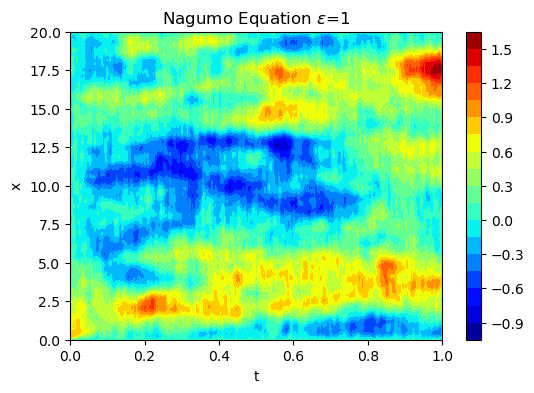

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Nagumo Equation $\\epsilon$=1'}, xlabel='t', ylabel='x'>)

In [ ]:
a=20; J = int(1e3)
x = np.linspace(0, a, J + 1)
u0 = 1/(1+np.exp(-(2-x)/sqrt(2)))
ell = 1; 
N = int(512); 
T = 1; epsilon = 1; sigma = 1
t, x, ut = Utils.Spde_EM_FDM_Nagumo_Exponential(u0, T, a, N, J, epsilon, sigma, ell, Utils.fNagumo)
T, X = np.meshgrid(t, x)
print(ut.shape)
Utils.Plot_contourf(T, X, ut, xlabel='t', ylabel='x', name=rf'Nagumo Equation $\epsilon$={epsilon} with exponential cov')

(1001, 513)


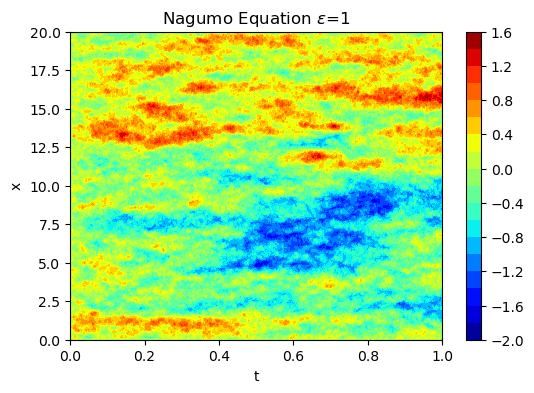

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Nagumo Equation $\\epsilon$=1'}, xlabel='t', ylabel='x'>)

In [ ]:
a=20; J = int(1e3)
x = np.linspace(0, a, J + 1)
u0 = np.zeros(J + 1)
N = int(512); 
T = 1; epsilon = 1; sigma = 1
t, x, ut = Utils.Spde_EM_FDM_Nagumo_White(u0, T, a, N, J, epsilon, sigma, Utils.fNagumo)
T, X = np.meshgrid(t, x)
print(ut.shape)
Utils.Plot_contourf(T, X, ut, xlabel='t', ylabel='x', name=rf'Nagumo Equation $\epsilon$={epsilon} with white noise')

#### EM Spectral

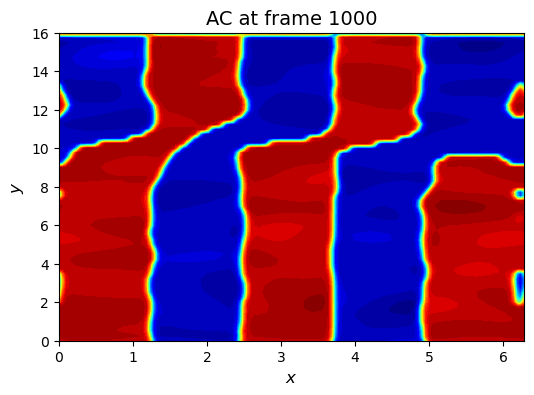

In [2]:
T=10
N=int(1e3)
a=np.array([2*pi, 16]); 
J=np.array([128, 64])
alpha=0.1; epsilon=1e-3; sigma=0.1; M=2; kappa=1
x=np.linspace(0,a[0],J[0]+1); 
y=np.linspace(0,a[1],J[1]+1)
xx,yy=np.meshgrid(x,y,indexing='ij')
u0=np.sin(xx*8/pi)*np.cos(pi**2*yy/64)
t, u, ut=Utils.Spde_twod_AC_EM_Galerkin(u0,T,a,N,kappa,J,epsilon, Utils.fAC, lambda u: sigma, alpha, M)
Utils.Generate_GIF(xx, yy, ut, 'x2', 'x1', 'AC')


#### EM FEM

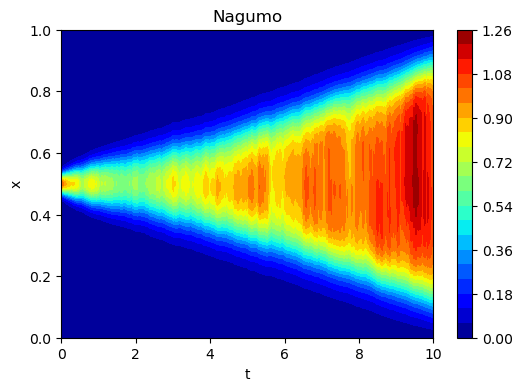

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Nagumo'}, xlabel='t', ylabel='x'>)

In [2]:
T=10; N=int(1e3); a=1; ne=512; h=a/ne
epsilon=1e-3; r=1; M=1; sigma=0.1
x=np.linspace(0,a,ne+1); u0=np.exp(-(x-0.5)**2/epsilon)
s0=np.random.RandomState()
t,u,ut = Utils.Spde_EM_FEM(u0,T,a,N,1,ne,1,epsilon, Utils.fNagumo, lambda u:sigma*u, r,M)
T, X = np.meshgrid(t, x)
Utils.Plot_contourf(T, X, ut, xlabel='t', ylabel='x', name='Nagumo')